In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ffn
%matplotlib inline
from dateutil.relativedelta import relativedelta

statarb

Stats for statarb from 2022-10-01 00:00:00 - 2025-10-31 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR     Max Drawdown
--------------  --------  -------  --------------
1653.60%            2.96  153.22%  -15.71%

Annualized Returns:
mtd     3m      6m      ytd      1y       3y       5y    10y    incep.
------  ------  ------  -------  -------  -------  ----  -----  --------
12.50%  25.20%  46.89%  121.87%  162.88%  148.16%  -     -      153.22%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.96     3.66       4.49
mean    66.70%   97.58%     148.87%
vol     22.53%   26.63%     33.17%
skew    0.68     0.49       1.24
kurt    3.25     1.00       -
best    8.55%    28.98%     185.89%
worst   -4.45%   -8.83%     121.87%

Drawdowns:
max      avg       # days
-------  ------  --------
-15.71%  -2.60%      8.24

Misc:
---------------  -------
avg. up month    9.30%
avg. down month  -4.77%
up year 

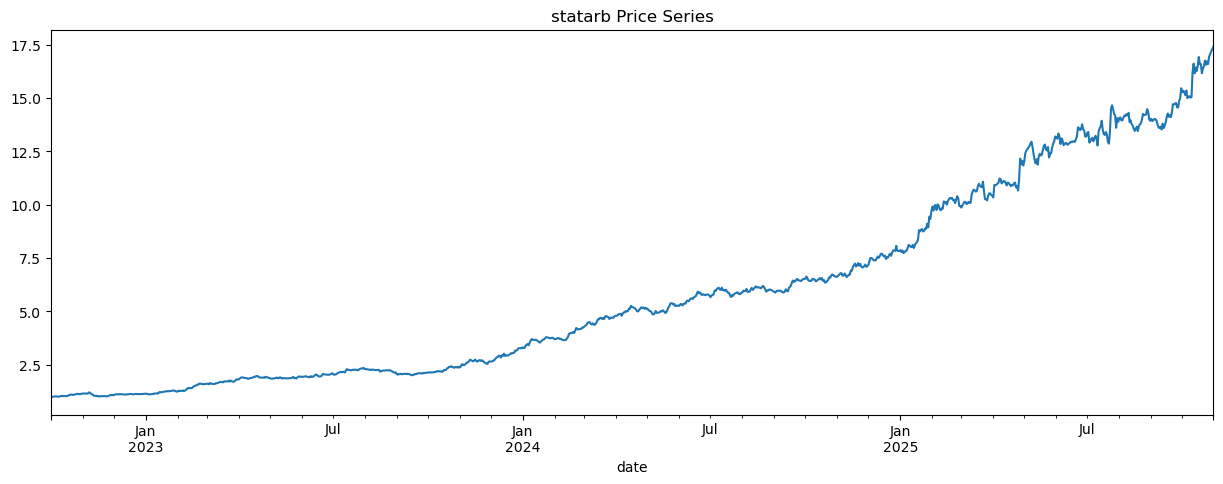

In [3]:
prices = pd.read_csv("highvol.csv")
#takes the raw data and puts it in a data structure that the library accepts
#take out spaces
clean_col_names = []
for i in range(0,len(prices.columns)):
    clean_col_names.append(prices.columns[i].strip())
    
prices.columns = clean_col_names
date = prices.columns[0]
prices[date] = pd.to_datetime(prices[date])
prices.set_index(date, inplace = True)
#makes it so its oldest date is the first row
# prices = prices.iloc[::-1]

for i in prices:
    print(i)
    print("")
    perf = prices[i].calc_stats()
    perf.display()
    print("")
    perf.display_monthly_returns()
    print("")
    perf.plot()

start                    2022-10-01 00:00:00
end                      2025-10-31 00:00:00
rf                                       0.0
total_return                       16.536004
cagr                                1.532236
max_drawdown                       -0.157078
calmar                              9.754637
mtd                                 0.124954
three_month                         0.251984
six_month                           0.468949
ytd                                 1.218689
one_year                            1.628839
three_year                          1.481563
five_year                                NaN
ten_year                                 NaN
incep                               1.532236
daily_sharpe                        2.960063
daily_sortino                       6.039871
daily_mean                          0.666989
daily_vol                           0.225329
daily_skew                          0.680739
daily_kurt                          3.251404
best_day  

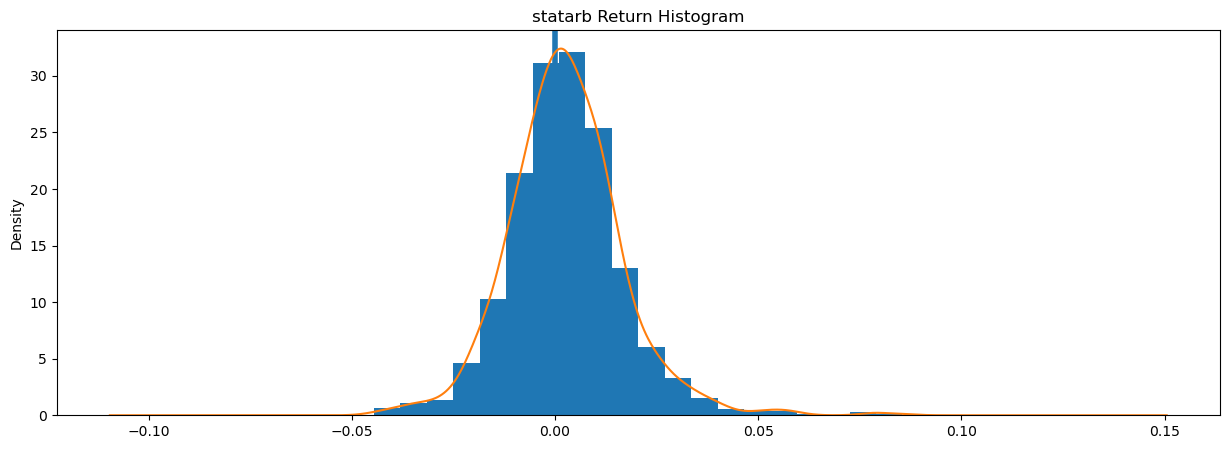

In [4]:
perf.plot_histogram()
perf.stats

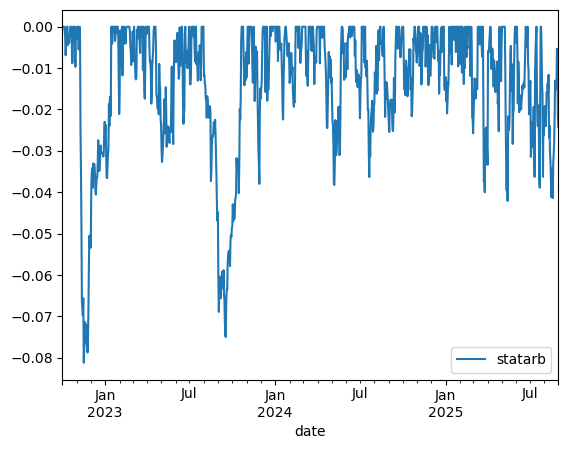

In [46]:
pd.set_option('display.max_rows', None)
stats = prices.calc_stats()
ax = stats.prices.to_drawdown_series().plot()